<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/Space_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import sys  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")  
print(f"Numpy version: {np.__version__}")

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Pandas version: 1.3.5
Numpy version: 1.21.6


In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
#Plot config
%matplotlib inline
sns.set_style('white')

In [50]:
#Files paths
train_path = "/content/train.csv"
test_path = "/content/test.csv"

# **Data correcting, completing, creating and completing.**


In [102]:
#Create DataFrames for both files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
both_df = [train_df, test_df]
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [52]:
#Let's see attributes of data
print(train_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [53]:
#See data size
print("Train size : {}\nTest size : {}".format(train_df.shape,test_df.shape))

Train size : (8693, 14)
Test size : (4277, 13)


In [54]:
#Check general info of both files
print(train_df.info())
print("-"*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13

In [55]:
#We have some null in every column, fill methodology will be importat
print("Train set")
print(train_df.isnull().sum())
print("-"*40)
print("Test set")
print(test_df.isnull().sum())

Train set
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------
Test set
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [56]:
#Here we see that half of the population was transported
train_df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [57]:
#In the data description some attr have hiden info let's extract it
#For example PassengerId is of the form gggg_pp where gggg indicates group and
#pp number of people in group we can extract each in different columns and drop 
#passengerid, REMEMBER passid has not nulls so we can do this before filling nulls.
train_df[["Group","PeopleGroup"]] =  train_df["PassengerId"].str.split("_", expand = True)
train_df.drop("PassengerId", axis = 1, inplace = True)
#Do the same for test 
test_df[["Group","PeopleGroup"]] =  test_df["PassengerId"].str.split("_", expand = True)
test_df.drop("PassengerId", axis = 1, inplace = True)

In [58]:
#Convert from string to int
train_df[["Group","PeopleGroup"]] = train_df[["Group","PeopleGroup"]].astype(int)
test_df[["Group","PeopleGroup"]] = test_df[["Group","PeopleGroup"]].astype(int)

In [59]:
#Check more info of train set
#Avg age is almost 30
#In every spend attr a lot of people spent almost 0 and some spent a lot
#avg people in group is 1.5
num_attr = "Age RoomService FoodCourt ShoppingMall Spa VRDeck PeopleGroup".split(" ")
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,PeopleGroup
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000


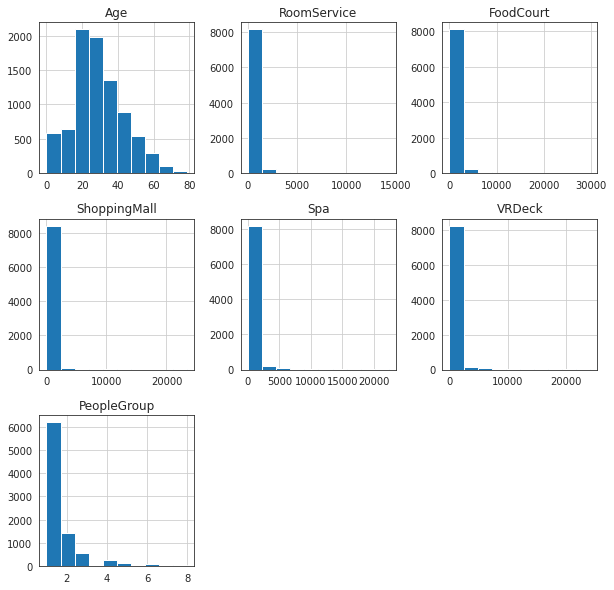

In [60]:
#Here we can easly see how a few people spent a lot and the mayority spend almost 0.
train_df[num_attr].hist(figsize = (10,10))
plt.show()

In [61]:
#Here we can see most people did not spend more than 10 dolars per attr
#Most people traveled alone
for attr in num_attr:
  print(f"{attr} interval")
  print(pd.qcut(train_df[attr], q = 10, duplicates = "drop").value_counts())
  print("-"*50)

Age interval
(-0.001, 13.0]    947
(13.0, 18.0]      918
(35.0, 41.0]      911
(21.0, 24.0]      907
(27.0, 31.0]      882
(18.0, 21.0]      881
(49.0, 79.0]      811
(41.0, 49.0]      791
(24.0, 27.0]      770
(31.0, 35.0]      696
Name: Age, dtype: int64
--------------------------------------------------
RoomService interval
(-0.001, 8.0]       5974
(175.6, 753.0]       852
(753.0, 14327.0]     851
(8.0, 175.6]         835
Name: RoomService, dtype: int64
--------------------------------------------------
FoodCourt interval
(-0.001, 13.0]       5967
(258.0, 1026.0]       851
(1026.0, 29813.0]     850
(13.0, 258.0]         842
Name: FoodCourt, dtype: int64
--------------------------------------------------
ShoppingMall interval
(-0.001, 5.0]       5962
(619.6, 23492.0]     849
(97.0, 619.6]        847
(5.0, 97.0]          827
Name: ShoppingMall, dtype: int64
--------------------------------------------------
Spa interval
(-0.001, 15.0]      5971
(179.2, 732.0]       854
(732.0, 22408.0

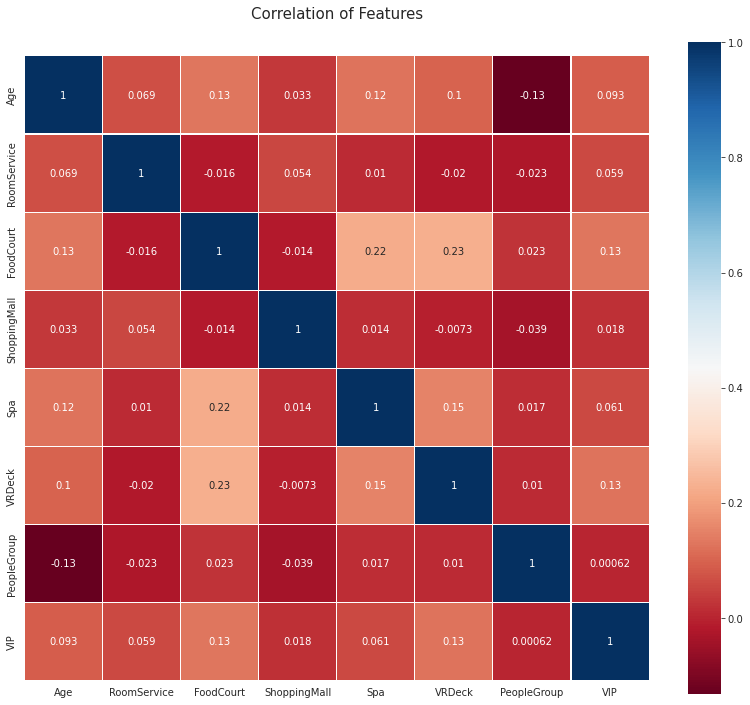

In [62]:
#Check correlation between money attr and vip
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df[num_attr + ["VIP"] ].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [63]:
#Some repeated names
#3 different planets
#Most people had unique cabin
#3 different destinantion
train_df.describe(include=["O"])

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [64]:
#Let's check how cattegorical attributes affect target one (Transported)
#As we can see Cryosleep seems really importat 
interesting_attr = "HomePlanet CryoSleep Destination VIP".split(" ")
for attr in interesting_attr:
  print(train_df[["Transported",attr]].groupby(attr).mean())

            Transported
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024
           Transported
CryoSleep             
False         0.328921
True          0.817583
               Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175
       Transported
VIP               
False     0.506332
True      0.381910


In [65]:
def spendcheck(spend_attr, x, dataframe = train_df, hue = None):
  #Create plot of spend attr vs x of specified kind
  # attr : spend_attr : list of spend attributes
  # attr: x : target to compare
  # attr : kind : type of graph
  # attr : dataframe: source dataframe

  fig, axes = plt.subplots(2,3, figsize=(15,10))
  graph_order = list(zip(spend_attr[0:3], axes[0])) + list(zip(spend_attr[3:5], axes[1]))

  for attr, ax in graph_order:
    sns.barplot(x = x, y = attr, data = dataframe, ax = ax, hue = hue)
  axes[1,2].set_visible(False)  


In [66]:
#Create spend attr list
spend_attr = "RoomService FoodCourt ShoppingMall Spa VRDeck".split(" ")

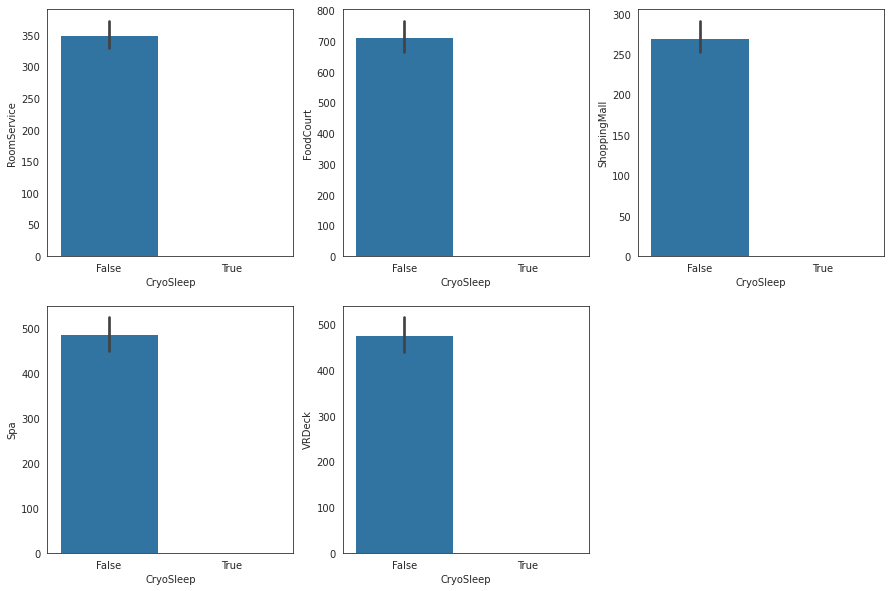

In [67]:
#Here we can see cryospleep people did not spend a single dolar
#remember cryosleep is strongly correlate to target var so study how to fill this attr is really important
spendcheck(x = "CryoSleep", spend_attr=spend_attr)

In [68]:
#We can fill some cryosleep with the new attr total spend when total spend is not 0 cryosleep is false when it is 0 it is true
train_df["TotalSpend"] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["Spa"] + train_df["VRDeck"] + train_df["ShoppingMall"] 
condition = (train_df["CryoSleep"].isnull()) & (train_df["TotalSpend"] == 0)
print(train_df.loc[condition][["CryoSleep", "TotalSpend"]].head(3))
#Let's throw this column and create a class to add new attr so we can implement this in a pipeline
train_df.drop("TotalSpend", axis = 1 , inplace = True)

    CryoSleep  TotalSpend
92        NaN         0.0
175       NaN         0.0
266       NaN         0.0


In [158]:
class GeneralTransformer(BaseEstimator, TransformerMixin):
#General Transformer class created to save some time
  def __init__(self):
    return self
  def fit(self):
    return self

In [218]:
class NullFiller(GeneralTransformer):
#Given a dict with key as col name and a method as value and a dataframe or np matrix
#returns the same array with filled values following filling methodology provided. 
  def __init__(self, fill_age = False, fill_0_spend = False):
      self.fill_age = fill_age
      self.fill_0_spend = fill_0_spend

  def age_generator(self, data):
  #Create random ages between mean and one std.
    rn = np.random.randint(low = data["Age"].mean() - data["Age"].std() , 
                          high = data["Age"].mean() + data["Age"].std() )
    return rn

  
  def transform(self, X, y = None):
    
    if self.fill_age :
      condition = X["Age"].isnull()
      null_index = X["Age"][condition].index
      for index in null_index:
        X.loc[index, "Age"] = self.age_generator(data = X)
      
    if self.fill_0_spend:
      no_condition = (X["CryoSleep"].isnull()) & (X["TotalSpend"] == 0) 
      condition = (X["CryoSleep"].isnull()) & (X["TotalSpend"] != 0)
      X.loc[no_condition, "CryoSleep"] = True
      X.loc[condition, "CryoSleep"] = False
    
    #return X


In [206]:
#Here I define a class to create intervals of continuous attributes
class IntervalGenerator(GeneralTransformer):
#Given a DF and columns name of dataframe create int label 
#param: cuts:int number of cuts 4 for quantiles 10 for deciles
#param: drop status: bool if true drop original column   
  def __init__(self,cols, drop_status = False ,cuts = 4, stick_interval = False):
    self.cuts = cuts
    self.drop_status = drop_status
    self.cols = cols
    self.stick_interval = stick_interval

  def transform(self, X, y=None):
    columns = self.cols
    if type(columns) is list:
      pass
    else :
      raise Exception("Names must be in a list")
    
    for column in columns:
      labels_ = [i for i in range(self.cuts)]
      label_interval = pd.qcut(X[column], q = self.cuts, labels = labels_)
      X[f"{column}Label"] = label_interval
      if self.stick_interval:
        X[f"{column}Interval"] = intervals
        intervals = pd.qcut(X[column], q = self.cuts)
      if self.drop_status:
        X.drop(column, axis = 1, inplace = True)
    #return X    

In [207]:
class AttrDroper(GeneralTransformer):
#Drop an attr from a df given a name or a list of names
  def __init__(self,columns):
    self.columns = columns

  def transform(self, X, y = None):
    X.drop(self.columns, axis = 1, inplace = True)
    #return X

In [221]:
class AttrAdder(GeneralTransformer):
  #Add attr to dataframe, condition is formated as add_attr = (add attr =True/False , drop columns used to add attr =True/False)
  def __init__(self, add_totalspend = (False,False)):
    self.add_totalspend = add_totalspend
  
  def transform(self, X, y = None):
    if self.add_totalspend[0]:
      X["TotalSpend"] = X["RoomService"] + X["FoodCourt"] + X["Spa"] + X["VRDeck"] + X["ShoppingMall"]
      if self.add_totalspend[1]:
        X.drop(["RoomService", "FoodCourt", "Spa", "VRDeck", "ShoppingMall"], axis = 1, inplace = True)
    #return X

## Inferences
- We can fill CryoSleep attribute creating a new class named totalspend and fill null CryoSleep where totaspend is 0 CryoSleep is True and where totalspend is not 0 CryoSleep is False.
- Age is not high std so i will fill it with mean +/- one std.

In [223]:
AttrAdder(add_totalspend=(True,False)).transform(train_df) #Add total spend attr
NullFiller(fill_age=True, fill_0_spend=True).transform(train_df) #Fill age and 0 cryosleep 
AttrDroper(["TotalSpend"]).transform(train_df) #Drop total spend because a lot of nulls
IntervalGenerator(["Age"], drop_status=True).transform(train_df) #Create age intervals and drop age

In [224]:
#We filled CryoSleep and age now lets try to fill 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8693 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  AgeLabel      8693 non-null   category
dtypes: bool(1), category(1), float64(5), object(7)
memory usage: 832.3+ KB


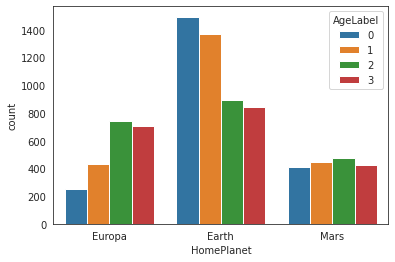

In [232]:
#Let's check HomePlants patterns and try to fill them.
sns.countplot(x = "HomePlanet", data = train_df, hue = "AgeLabel")
plt.show()

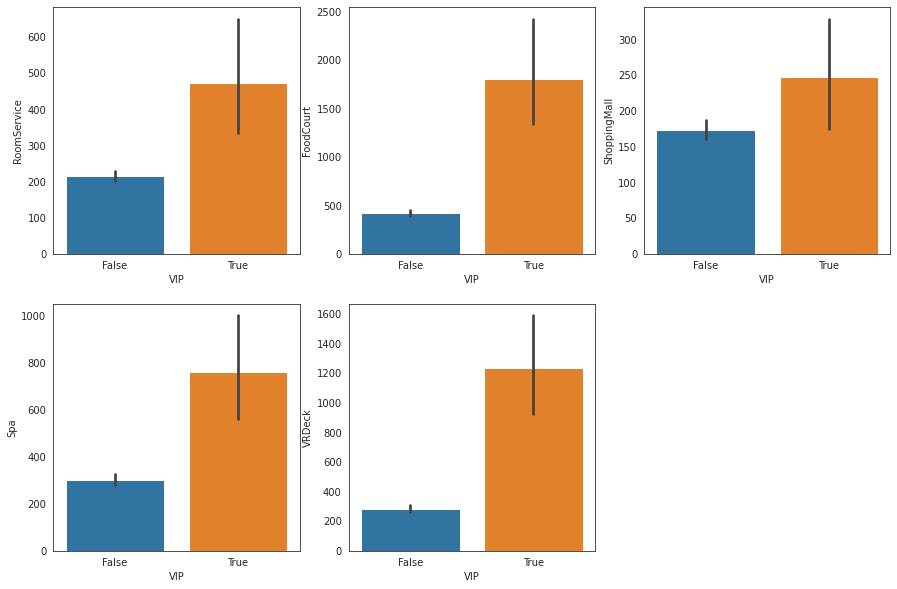

In [35]:
#In correlation matrix we saw vip people spend more so let's separate vip and normal people for spend analysis 
spendcheck(x = "VIP", spend_attr=spend_attr)

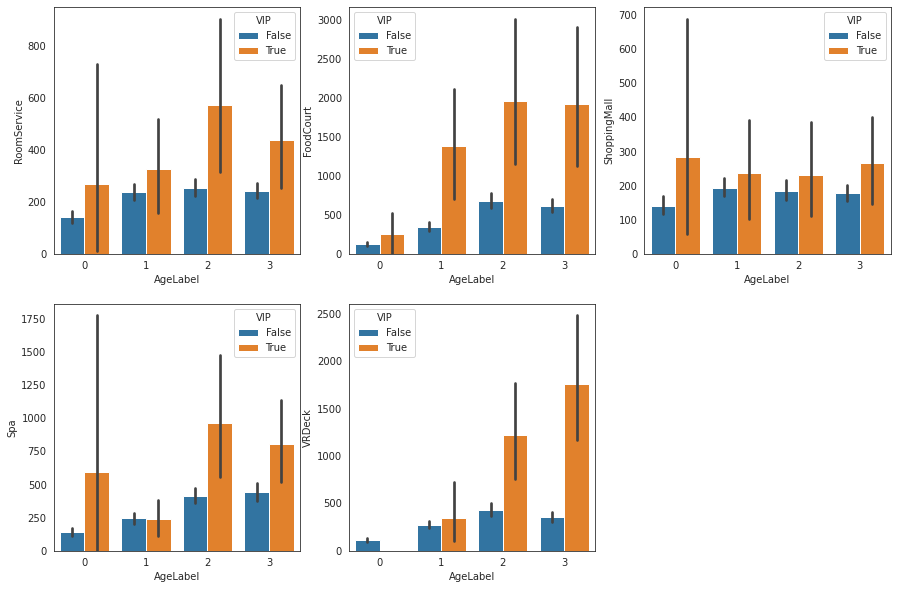

In [36]:
#Check how much people spend(mean) in each spend cat per age
#In spa there is a difference so we can use this relation for null filling
#same for food count
spendcheck(x = "AgeLabel", spend_attr=spend_attr, hue = "VIP")

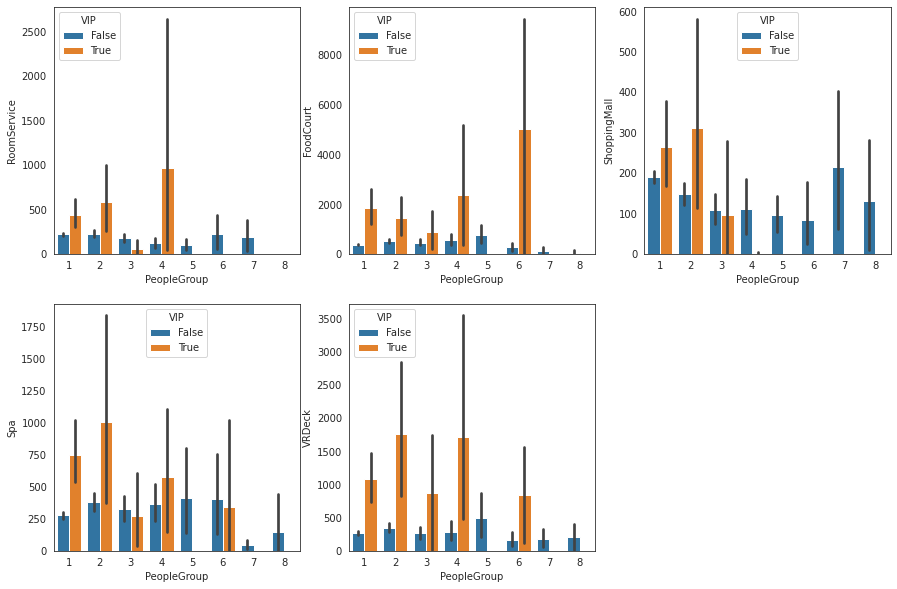

In [37]:
#Check how much people spend(mean) in each spend cat per group
spendcheck(x = "PeopleGroup", spend_attr=spend_attr, hue = "VIP")

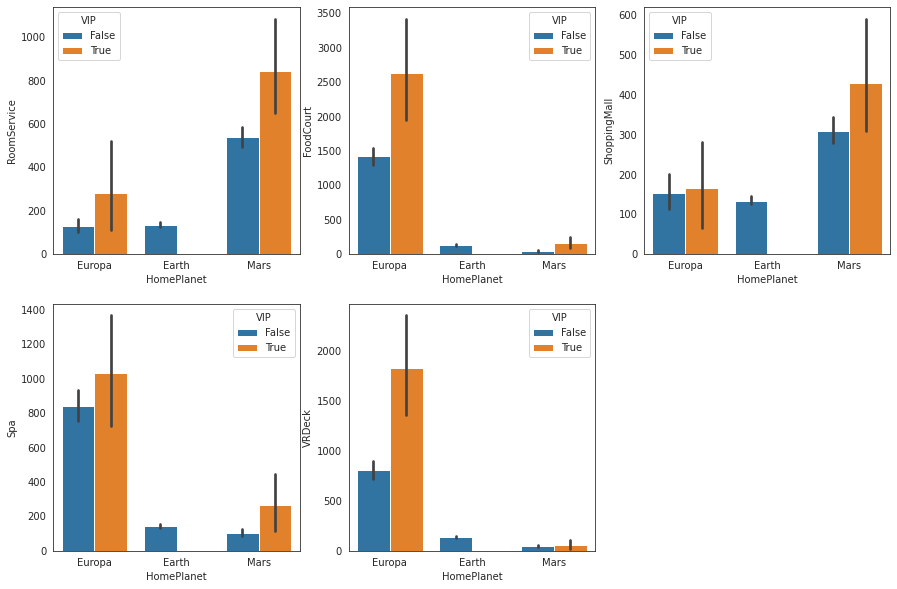

In [38]:
#Check how much people spend(mean) in each spend cat per home planet
#Here we can see bog differences this can be used for null filling
spendcheck(spend_attr = spend_attr, x = "HomePlanet" , hue = "VIP")

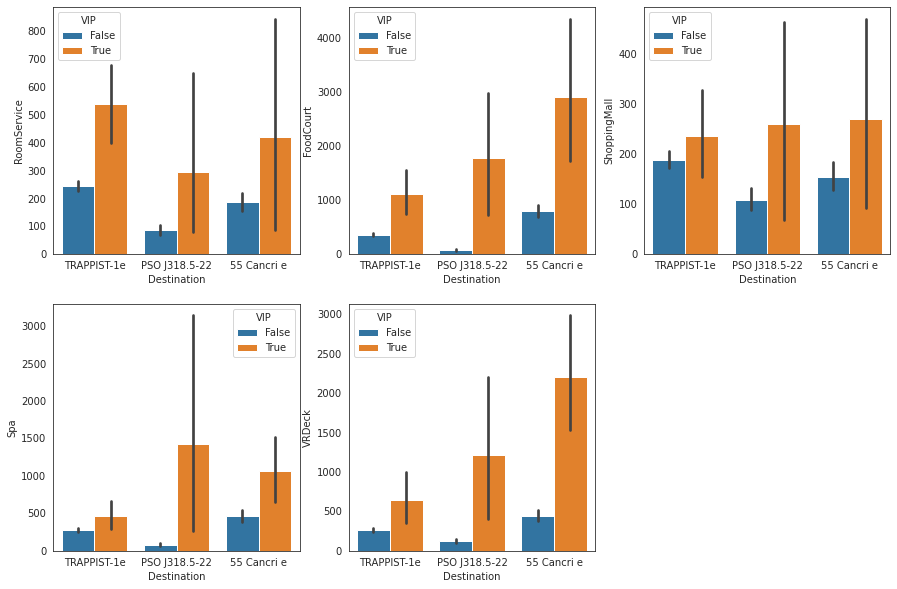

In [39]:
spendcheck(x = "Destination", spend_attr=spend_attr, hue = "VIP")